1.generate the data from iris dateset which is with 4 features and 3 labels.
2.abandon feature 3 and feature 4 (x3,x4) for visualiizng easily (maybe in a better way like faltten the features in the future),and combine label 3 with label 2 making only 2 label in dataset for doing two labels classification easily.
3.generate the new dataset from the original iris dataset above,by adding bounded error  into each feature above individually (x1,x2),(x1 +- (x1'mean * 0.1err),x2)
4.same as no.3 but accumulately

In [424]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [425]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [426]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [427]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [428]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_x1be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.1
e2 = temp['x2'].mean()*0.1

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_x1be = np.vstack((df_2feature_x1be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_x1be = np.vstack((df_2feature_x1be,temp))
temp = df_2feature.copy()

df_2feature_x1be = pd.DataFrame(df_2feature_x1be)
df_2feature_x1be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2
0,4.600000,3.1,0.0
1,5.000000,3.6,0.0
2,4.600000,3.4,0.0
3,4.400000,2.9,0.0
4,4.300000,3.0,0.0
...,...,...,...
208,7.113803,3.0,1.0
209,5.713803,3.4,1.0
210,5.813803,3.1,1.0
211,6.213803,3.2,1.0


In [429]:
df_2feature_x2be = pd.DataFrame.to_numpy(df_2feature)

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_x2be = np.vstack((df_2feature_x2be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_x2be = np.vstack((df_2feature_x2be,temp))
temp = df_2feature.copy()

df_2feature_x2be = pd.DataFrame(df_2feature_x2be)
df_2feature_x2be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
208,7.7,2.695634,1.0
209,6.3,3.095634,1.0
210,6.4,2.795634,1.0
211,6.8,2.895634,1.0


In [430]:
def plot_hyperplane(clf, X, y,h=0.02,draw_sv=True,title='hyperplane'):
    # create a mesh to plot in
    plt.figure(figsize=(10,6))
    X = np.mat(X)
    # print("X",X)
    # print("y",y)
 
    # 使用numpy的库函数找到最值,确定绘图范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
 
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    # print("Z", np.c_[xx.ravel(), yy.ravel()])
    
    # x,y扁平化,生成二维坐标并将预测值作为函数值
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # SVM的分割超平面
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # 绘制康拓图
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)
 
    markers = ['o', '*', '^']
    colors = ['r', 'b', 'c']
    # 去重
    labels = np.unique(y)
    # print("LABELS",y)
 
    # 对于每一个标签种类
    for label in labels:
        # 这是掩码索引
        label = int(label)
        plt.scatter(X[y == label][:, 0].tolist(),
                    X[y == label][:, 1].tolist(),
                    c=colors[label],
                    marker=markers[label])
    # 画出支持向量
    if draw_sv:
        sv = clf.support_vectors_
        print(sv)
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')


[[0.0060001  0.9939999 ]
 [0.27680391 0.72319609]
 [0.06781261 0.93218739]
 [0.01366006 0.98633994]]
[[3.96981352e-06 9.99996030e-01]
 [1.18545941e-08 9.99999988e-01]
 [3.27611852e-07 9.99999672e-01]
 [2.62504067e-03 9.97374959e-01]]
Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


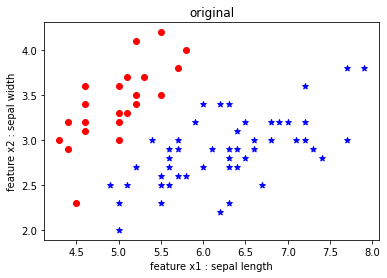

BESVM Accuracy (on training) = x1 with bounded error 0.1 : 0.9352941176470588
BESVM Accuracy (on testing) = x1 with bounded error 0.1 : 0.9534883720930233


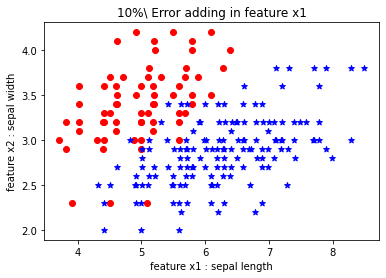

In [431]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_x1be.iloc[:, :-1].values
y_be = df_2feature_x1be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto',probability=True)
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict_proba(X_test[:4])
#print(y_original_predict)
t = clf_original.predict_proba(X_train[:4])
#print(t)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = x1 with bounded error 0.1 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = x1 with bounded error 0.1 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('10%\ Error adding in feature x1')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


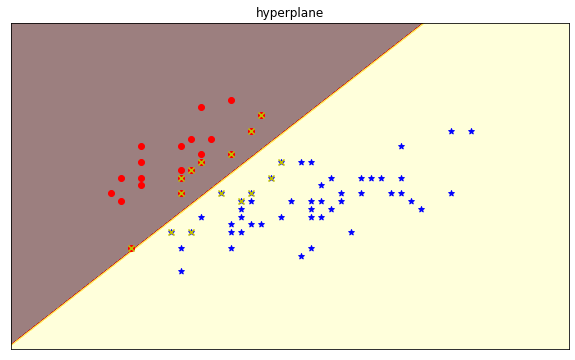

[[5.08619718 2.3       ]
 [5.18619718 3.2       ]
 [4.5        2.3       ]
 [4.98619718 3.2       ]
 [5.2        3.4       ]
 [5.58619718 3.        ]
 [5.78619718 3.5       ]
 [4.88619718 3.        ]
 [5.88619718 3.7       ]
 [6.28619718 3.8       ]
 [4.98619718 2.9       ]
 [5.58619718 3.3       ]
 [6.08619718 3.5       ]
 [5.         3.        ]
 [5.78619718 3.4       ]
 [5.1        3.3       ]
 [5.         3.2       ]
 [5.68619718 3.3       ]
 [6.38619718 4.        ]
 [4.4        2.9       ]
 [5.58619718 3.2       ]
 [5.18619718 3.1       ]
 [5.58619718 3.6       ]
 [5.01380282 2.8       ]
 [5.61380282 3.4       ]
 [6.3        3.4       ]
 [5.01380282 2.7       ]
 [5.31380282 3.2       ]
 [4.91380282 2.6       ]
 [5.11380282 2.9       ]
 [5.91380282 3.2       ]
 [7.11380282 3.8       ]
 [6.61380282 3.6       ]
 [4.51380282 2.5       ]
 [5.7        3.        ]
 [5.81380282 3.1       ]
 [5.01380282 2.9       ]
 [6.2        3.4       ]
 [4.81380282 3.        ]
 [5.9        3.2       ]


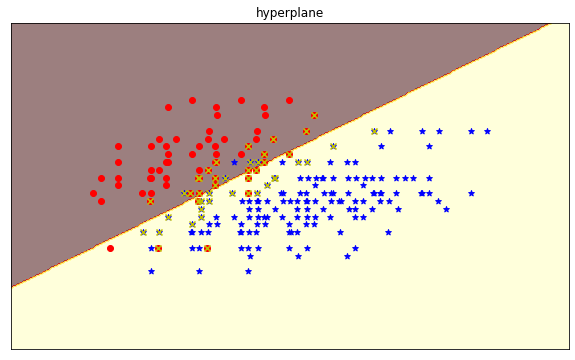

In [432]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()

In [433]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = x1 with bounded error 0.1 : '+str(result_be_test))




Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = x1 with bounded error 0.1 : 1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


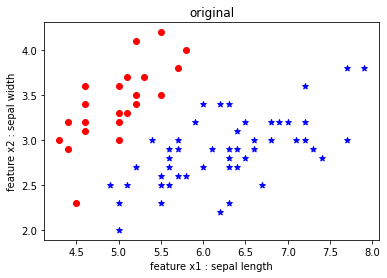

BESVM Accuracy (on training) = x2 with bounded error 0.1 : 0.9941176470588236
BESVM Accuracy (on testing) = x2 with bounded error 0.1 : 0.8604651162790697


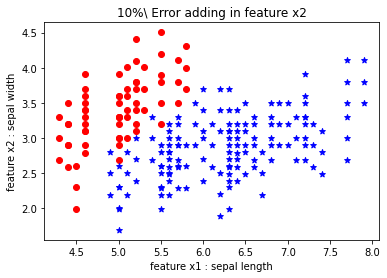

In [434]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_x2be.iloc[:, :-1].values
y_be = df_2feature_x2be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = x2 with bounded error 0.1 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = x2 with bounded error 0.1 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('10%\ Error adding in feature x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


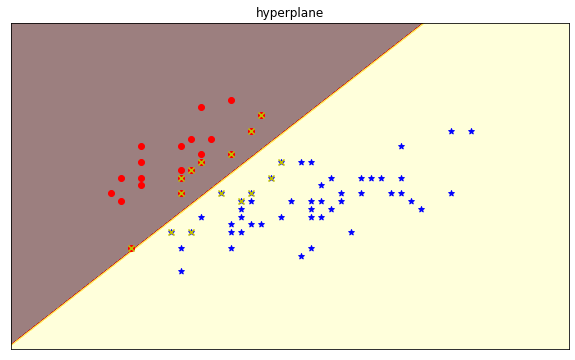

[[5.2       3.0956338]
 [4.5       2.6043662]
 [4.5       2.3      ]
 [5.8       4.       ]
 [5.2       3.4      ]
 [5.2       3.1956338]
 [5.3       3.3956338]
 [5.7       3.8      ]
 [5.8       3.6956338]
 [5.        3.       ]
 [5.1       3.3      ]
 [5.        2.9956338]
 [5.        2.8956338]
 [5.1       2.5      ]
 [5.        2.6043662]
 [5.7       3.3043662]
 [5.7       3.2043662]
 [5.9       3.5043662]
 [5.6       3.2043662]
 [6.        3.7043662]
 [5.2       2.7      ]
 [4.9       2.8043662]
 [6.2       3.7043662]
 [4.9       2.5      ]
 [5.4       3.       ]]


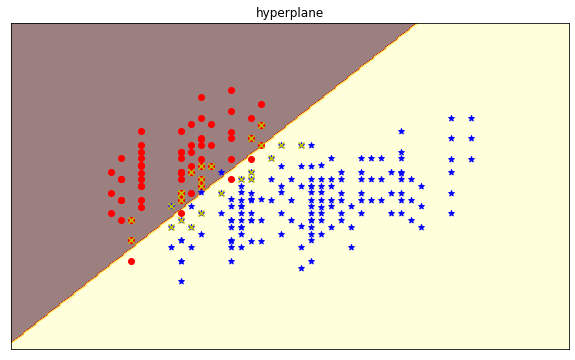

In [435]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()

In [436]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = x2 with bounded error 0.1 : '+str(result_be_test))


Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = x2 with bounded error 0.1 : 1.0


raise the BE up to 20% and not accumulate the dataset,
oriiginal : 117
10% err : 213
20% err : 213

In [437]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_x1be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.2
e2 = temp['x2'].mean()*0.2 

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_x1be = np.vstack((df_2feature_x1be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_x1be = np.vstack((df_2feature_x1be,temp))
temp = df_2feature.copy()

df_2feature_x1be = pd.DataFrame(df_2feature_x1be)
df_2feature_x1be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2
0,4.600000,3.1,0.0
1,5.000000,3.6,0.0
2,4.600000,3.4,0.0
3,4.400000,2.9,0.0
4,4.300000,3.0,0.0
...,...,...,...
208,6.527606,3.0,1.0
209,5.127606,3.4,1.0
210,5.227606,3.1,1.0
211,5.627606,3.2,1.0


In [438]:
df_2feature_x2be = pd.DataFrame.to_numpy(df_2feature)

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_x2be = np.vstack((df_2feature_x2be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_x2be = np.vstack((df_2feature_x2be,temp))
temp = df_2feature.copy()

df_2feature_x2be = pd.DataFrame(df_2feature_x2be)
df_2feature_x2be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
208,7.7,2.391268,1.0
209,6.3,2.791268,1.0
210,6.4,2.491268,1.0
211,6.8,2.591268,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


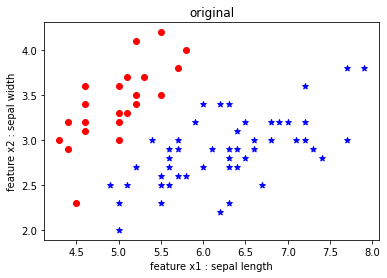

BESVM Accuracy (on training) = x1 with bounded error 0.2 : 0.8588235294117647
BESVM Accuracy (on testing) = x1 with bounded error 0.2 : 0.9069767441860465


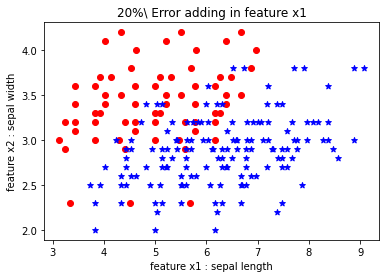

In [439]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_x1be.iloc[:, :-1].values
y_be = df_2feature_x1be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = x1 with bounded error 0.2 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = x1 with bounded error 0.2 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('20%\ Error adding in feature x1')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


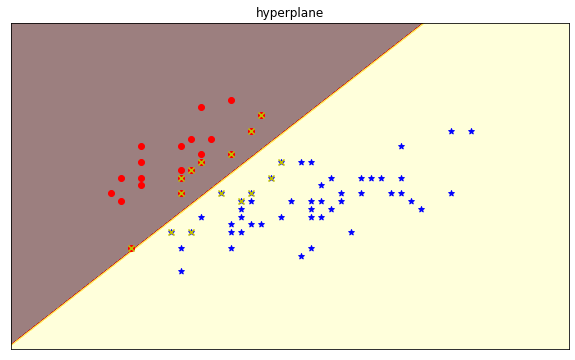

[[6.27239437 3.7       ]
 [5.67239437 2.3       ]
 [5.77239437 3.2       ]
 [3.22760563 2.9       ]
 [4.5        2.3       ]
 [5.57239437 3.2       ]
 [5.2        3.4       ]
 [6.17239437 3.        ]
 [6.37239437 3.5       ]
 [5.47239437 3.        ]
 [5.         3.3       ]
 [6.47239437 3.7       ]
 [4.6        3.4       ]
 [5.7        3.8       ]
 [6.87239437 3.8       ]
 [5.57239437 2.9       ]
 [6.17239437 3.3       ]
 [6.67239437 3.5       ]
 [5.         3.        ]
 [6.37239437 3.4       ]
 [5.1        3.3       ]
 [5.         3.2       ]
 [6.27239437 3.3       ]
 [6.97239437 4.        ]
 [4.4        2.9       ]
 [5.         3.6       ]
 [6.17239437 3.2       ]
 [3.42760563 3.1       ]
 [3.82760563 3.2       ]
 [3.12760563 3.        ]
 [5.77239437 3.1       ]
 [5.77239437 3.6       ]
 [6.17239437 3.6       ]
 [4.42760563 2.8       ]
 [5.02760563 3.4       ]
 [4.92760563 2.9       ]
 [6.72760563 3.8       ]
 [6.3        3.4       ]
 [4.42760563 2.7       ]
 [4.72760563 3.2       ]


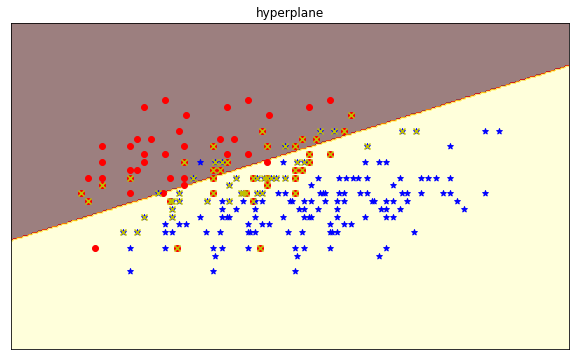

In [440]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()

In [441]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)
#print(subset.info())
print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = x1 with bounded error 0.2 : '+str(result_be_test))


Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = x1 with bounded error 0.2 : 0.8333333333333334


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


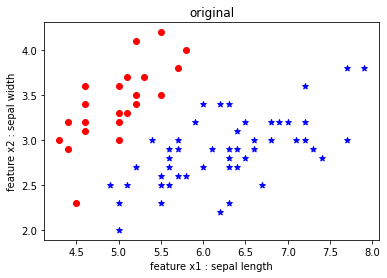

BESVM Accuracy (on training) = x2 with bounded error 0.2 : 0.9470588235294117
BESVM Accuracy (on testing) = x2 with bounded error 0.2 : 0.813953488372093


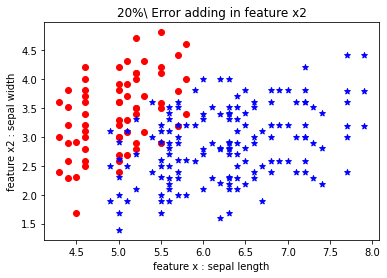

In [442]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_x2be.iloc[:, :-1].values
y_be = df_2feature_x2be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = x2 with bounded error 0.2 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = x2 with bounded error 0.2 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('20%\ Error adding in feature x2')
plt.xlabel('feature x : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


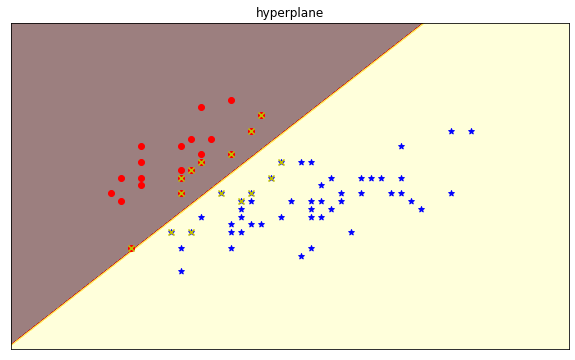

[[5.         2.99126761]
 [5.2        2.79126761]
 [4.5        2.3       ]
 [5.8        4.        ]
 [5.2        3.4       ]
 [5.2        2.89126761]
 [5.3        3.09126761]
 [5.7        3.8       ]
 [5.2        3.49126761]
 [5.8        3.39126761]
 [5.         3.        ]
 [5.1        3.3       ]
 [5.         2.69126761]
 [5.1        3.09126761]
 [4.6        2.49126761]
 [5.         2.59126761]
 [5.5        3.59126761]
 [5.3        3.7       ]
 [5.1        2.5       ]
 [5.         2.        ]
 [5.         2.90873239]
 [5.7        3.60873239]
 [5.7        3.50873239]
 [5.6        3.10873239]
 [5.         2.60873239]
 [5.9        3.80873239]
 [5.6        3.50873239]
 [5.5        3.10873239]
 [6.         4.00873239]
 [5.2        2.7       ]
 [5.         2.3       ]
 [4.9        3.10873239]
 [5.6        3.30873239]
 [6.2        4.00873239]
 [4.9        2.5       ]
 [4.9        1.89126761]
 [5.4        3.        ]]


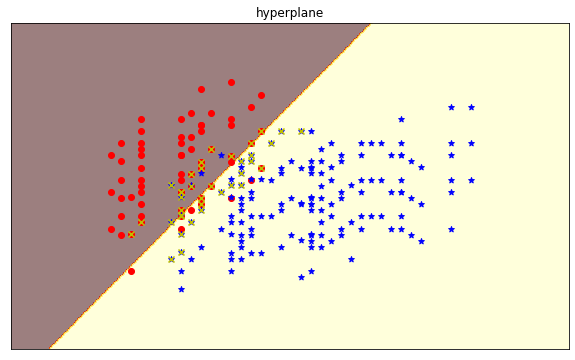

In [443]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()

In [444]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)
#print(subset.info())
print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = x2 with bounded error 0.2 : '+str(result_be_test))


Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = x2 with bounded error 0.2 : 1.0


raise the BE up to 30% and not accumulate the dataset,
oriiginal : 71
10% err : 213
20% err : 213

In [445]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_x1be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3
e2 = temp['x2'].mean()*0.3

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_x1be = np.vstack((df_2feature_x1be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_x1be = np.vstack((df_2feature_x1be,temp))
temp = df_2feature.copy()

df_2feature_x1be = pd.DataFrame(df_2feature_x1be)
df_2feature_x1be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2
0,4.600000,3.1,0.0
1,5.000000,3.6,0.0
2,4.600000,3.4,0.0
3,4.400000,2.9,0.0
4,4.300000,3.0,0.0
...,...,...,...
208,5.941408,3.0,1.0
209,4.541408,3.4,1.0
210,4.641408,3.1,1.0
211,5.041408,3.2,1.0


In [446]:
df_2feature_x2be = pd.DataFrame.to_numpy(df_2feature)

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_x2be = np.vstack((df_2feature_x2be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_x2be = np.vstack((df_2feature_x2be,temp))
temp = df_2feature.copy()

df_2feature_x2be = pd.DataFrame(df_2feature_x2be)
df_2feature_x2be

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
208,7.7,2.086901,1.0
209,6.3,2.486901,1.0
210,6.4,2.186901,1.0
211,6.8,2.286901,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


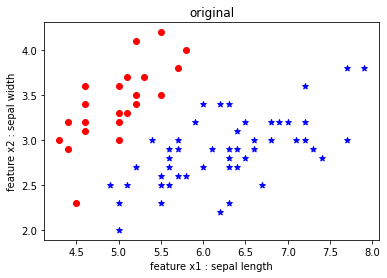

BESVM Accuracy (on training) = x1 with bounded error 0.3 : 0.8470588235294118
BESVM Accuracy (on testing) = x1 with bounded error 0.3 : 0.8604651162790697


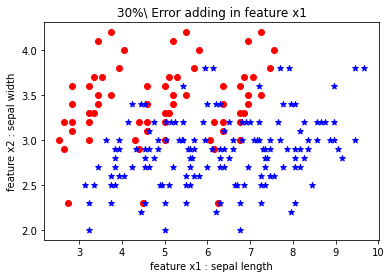

In [447]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_x1be.iloc[:, :-1].values
y_be = df_2feature_x1be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = x1 with bounded error 0.3 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = x1 with bounded error 0.3 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('30%\ Error adding in feature x1')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


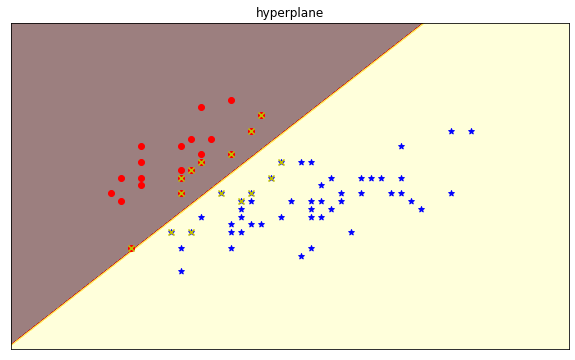

[[3.44140845 3.4       ]
 [6.85859155 3.7       ]
 [6.25859155 2.3       ]
 [6.35859155 3.2       ]
 [2.64140845 2.9       ]
 [4.5        2.3       ]
 [6.15859155 3.2       ]
 [5.2        3.4       ]
 [2.64140845 3.2       ]
 [6.75859155 3.        ]
 [6.95859155 3.5       ]
 [6.05859155 3.        ]
 [5.         3.3       ]
 [7.05859155 3.7       ]
 [4.6        3.4       ]
 [5.7        3.8       ]
 [7.45859155 3.8       ]
 [6.15859155 2.9       ]
 [6.75859155 3.3       ]
 [7.25859155 3.5       ]
 [5.         3.        ]
 [6.95859155 3.4       ]
 [5.1        3.3       ]
 [3.24140845 3.3       ]
 [5.         3.2       ]
 [6.85859155 3.3       ]
 [7.55859155 4.        ]
 [4.4        2.9       ]
 [4.6        3.6       ]
 [5.         3.6       ]
 [5.1        3.7       ]
 [6.75859155 3.2       ]
 [2.84140845 3.1       ]
 [3.24140845 3.2       ]
 [2.54140845 3.        ]
 [5.3        3.7       ]
 [6.35859155 3.1       ]
 [6.35859155 3.6       ]
 [6.75859155 3.6       ]
 [3.84140845 2.8       ]


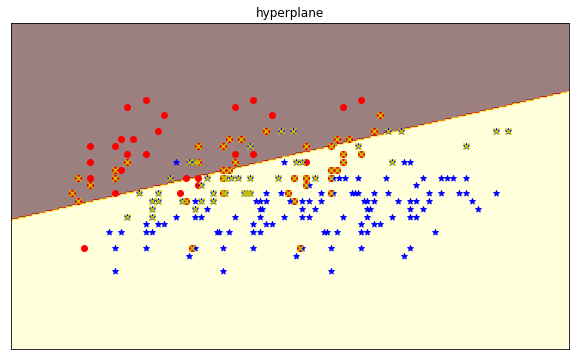

In [448]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()


In [449]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)
#print(subset.info())
print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = x1 with bounded error 0.3 : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = x1 with bounded error 0.3 : 0.8


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


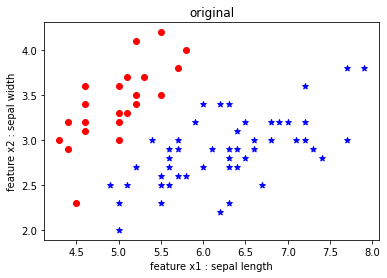

BESVM Accuracy (on training) = x2 with bounded error 0.3 : 0.9235294117647059
BESVM Accuracy (on testing) = x2 with bounded error 0.3 : 0.813953488372093


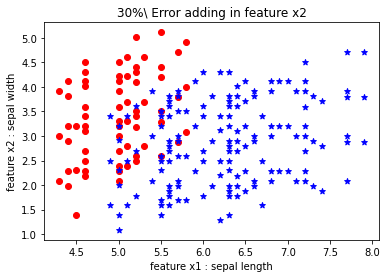

In [450]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_x2be.iloc[:, :-1].values
y_be = df_2feature_x2be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = x2 with bounded error 0.3 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = x2 with bounded error 0.3 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('30%\ Error adding in feature x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


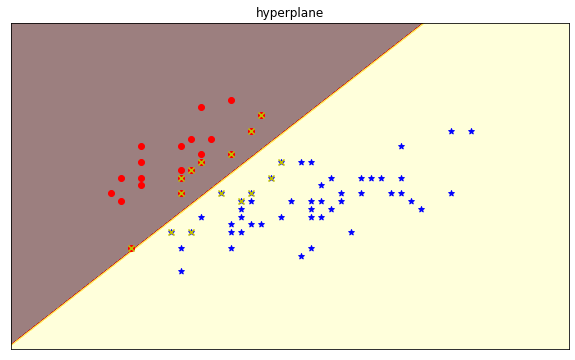

[[5.         2.68690141]
 [5.2        2.48690141]
 [5.5        4.2       ]
 [5.8        4.        ]
 [5.2        3.4       ]
 [5.2        2.58690141]
 [5.3        2.78690141]
 [5.7        3.8       ]
 [5.7        4.71309859]
 [5.2        3.18690141]
 [5.5        4.41309859]
 [5.8        3.08690141]
 [5.         3.        ]
 [5.1        3.3       ]
 [5.         2.38690141]
 [5.         3.2       ]
 [5.8        4.91309859]
 [5.1        2.78690141]
 [4.6        2.18690141]
 [5.         2.28690141]
 [5.5        3.28690141]
 [5.3        3.7       ]
 [5.1        2.5       ]
 [5.         2.        ]
 [5.         3.21309859]
 [5.7        3.91309859]
 [5.7        3.81309859]
 [5.6        3.41309859]
 [5.         2.91309859]
 [5.9        4.11309859]
 [5.         1.38690141]
 [5.8        3.51309859]
 [5.6        3.81309859]
 [5.5        3.41309859]
 [5.5        2.6       ]
 [6.         4.31309859]
 [5.2        2.7       ]
 [5.         2.3       ]
 [4.9        3.41309859]
 [5.6        3.61309859]


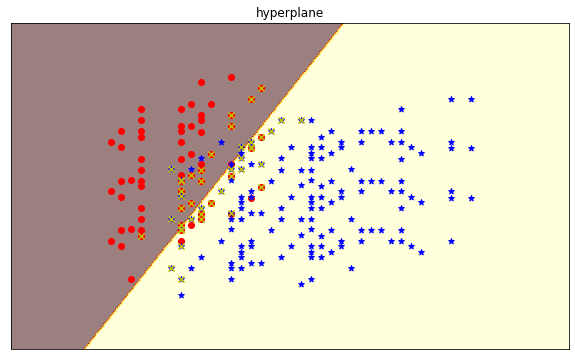

In [451]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()

In [452]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)
#print(subset.info())
print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = x2 with bounded error 0.3 : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = x2 with bounded error 0.3 : 0.9666666666666667
